# **Estudo de modelo preditivo de Epidemias**

Integrantes:

- Esdras Gabriel Alves Batista (egab@cin.ufpe.br);
- Henrique César Higino Holanda Cordeiro (hchhc@cin.ufpe.br);
- João Victor Nascimento Lima (jvnl@cin.ufpe.br);
- Luiz Gustavo Pinheiro dos Santos Silva (lgpss@cin.ufpe.br);
- Márcio André Amorim de Campos Júnior (maacj@cin.ufpe.br);

# Resumo

Com o auxílio de meios matemáticos, almejamos criar um modelo preditivo eficiente quanto ao assunto de epidemias. Descrevê-lo em um cenário mais simples e controlado para que possamos entender a melhor forma de ajustar seus parâmetros e então aplicá-lo em um modelo mais realista.


# Introdução

As epidemias têm sido um dos desafios mais persistentes e impactantes da humanidade, afetando profundamente a saúde pública, a economia e a organização social ao longo da história. Doenças infecciosas, como a gripe espanhola no início do século XX, a pandemia de HIV/AIDS nas décadas de 1980 e 1990, e, mais recentemente, a COVID-19, mostram como os patógenos podem se espalhar rapidamente em populações vulneráveis, exigindo respostas rápidas e bem fundamentadas para minimizar seus efeitos. Nesse contexto, a modelagem matemática aparece como uma ferramenta essencial para entender como as doenças se espalham e para ajudar a criar estratégias eficazes de prevenção e controle.

Prever como uma epidemia vai se comportar é crucial para tomar decisões em saúde pública. Modelos matemáticos, como o SIR (Suscetíveis-Infectados-Recuperados), permitem simular cenários de propagação de doenças, identificando padrões de transmissão e avaliando fatores importantes, como a taxa de contato entre as pessoas, o tempo de incubação e os efeitos de intervenções, como distanciamento social, quarentena e vacinação. Esses modelos não só ajudam a entender como uma epidemia evolui, mas também fornecem informações valiosas para orientar políticas públicas voltadas ao controle e à erradicação de surtos e pandemias.  

Neste projeto, vamos explorar a dinâmica da propagação de epidemias usando equações diferenciais acopladas. Vamos aplicar o modelo SIR e ampliá-lo para simular cenários de propagação de doenças e analisar como os parâmetros, taxa de contato e de recuperação, influenciam a evolução de epidemias. Além disso, vamos investigar o impacto de intervenções, como vacinação e medicação, na mitigação da propagação da doença.

A importância desse estudo vai além da teoria. Em um mundo cada vez mais conectado, onde doenças podem se espalhar rapidamente entre países e continentes, a capacidade de prever e controlar epidemias é essencial. A modelagem matemática não só nos ajuda a entender melhor como as doenças se espalham, mas também auxilia na distribuição eficiente de recursos de saúde, na criação de políticas públicas e na conscientização da população sobre a importância de medidas preventivas. Com este trabalho, esperamos contribuir para o entendimento da dinâmica das epidemias e fornecer ferramentas que possam ajudar na tomada de decisões em saúde pública, visando um futuro mais seguro e preparado.  



# Objetivos
O projeto tem como principal objetivo o desenvolvimento de um modelo preditivo eficiente para o estudo da propagação de epidemias, utilizando métodos matemáticos. Para isso, buscamos estruturar o modelo em um cenário inicial simplificado e controlado, permitindo uma melhor compreensão do ajuste de seus parâmetros e comportamento dinâmico.

### Os objetivos específicos incluem:
- Implementar o modelo SIR – Utilizar o modelo SIR (Suscetíveis, Infectados e Recuperados) para simular a propagação de uma doença infecciosa em um ambiente controlado.
- Analisar a dinâmica da propagação em diferentes cenários epidemiológicos – Observar a evolução do número de suscetíveis, infectados e recuperados ao longo do tempo quando as taxas são modificadas.
- Ampliar complexidade do modelo – Avaliar o impacto de medidas de controle, medicação e vacinação, na propagação da epidemia, ou seja, modificar o SIR para contabilizar outros fatores.
- Validar o modelo com dados reais – Comparar os resultados obtidos com dados históricos de epidemias para verificar a precisão das previsões.

#### Com essas etapas, esperamos desenvolver um modelo robusto e flexível, capaz de fornecer insights relevantes para a compreensão e mitigação da propagação de doenças infecciosas.

# Mapa Mental

[Mapa Mental no coogle](https://coggle.it/diagram/Z7DWvXKA46ZTkb8t/t/-/5048b49b2f31146b08bb972b85b0adb919c55d22e1c56ecad293b44b3cb5a47e)


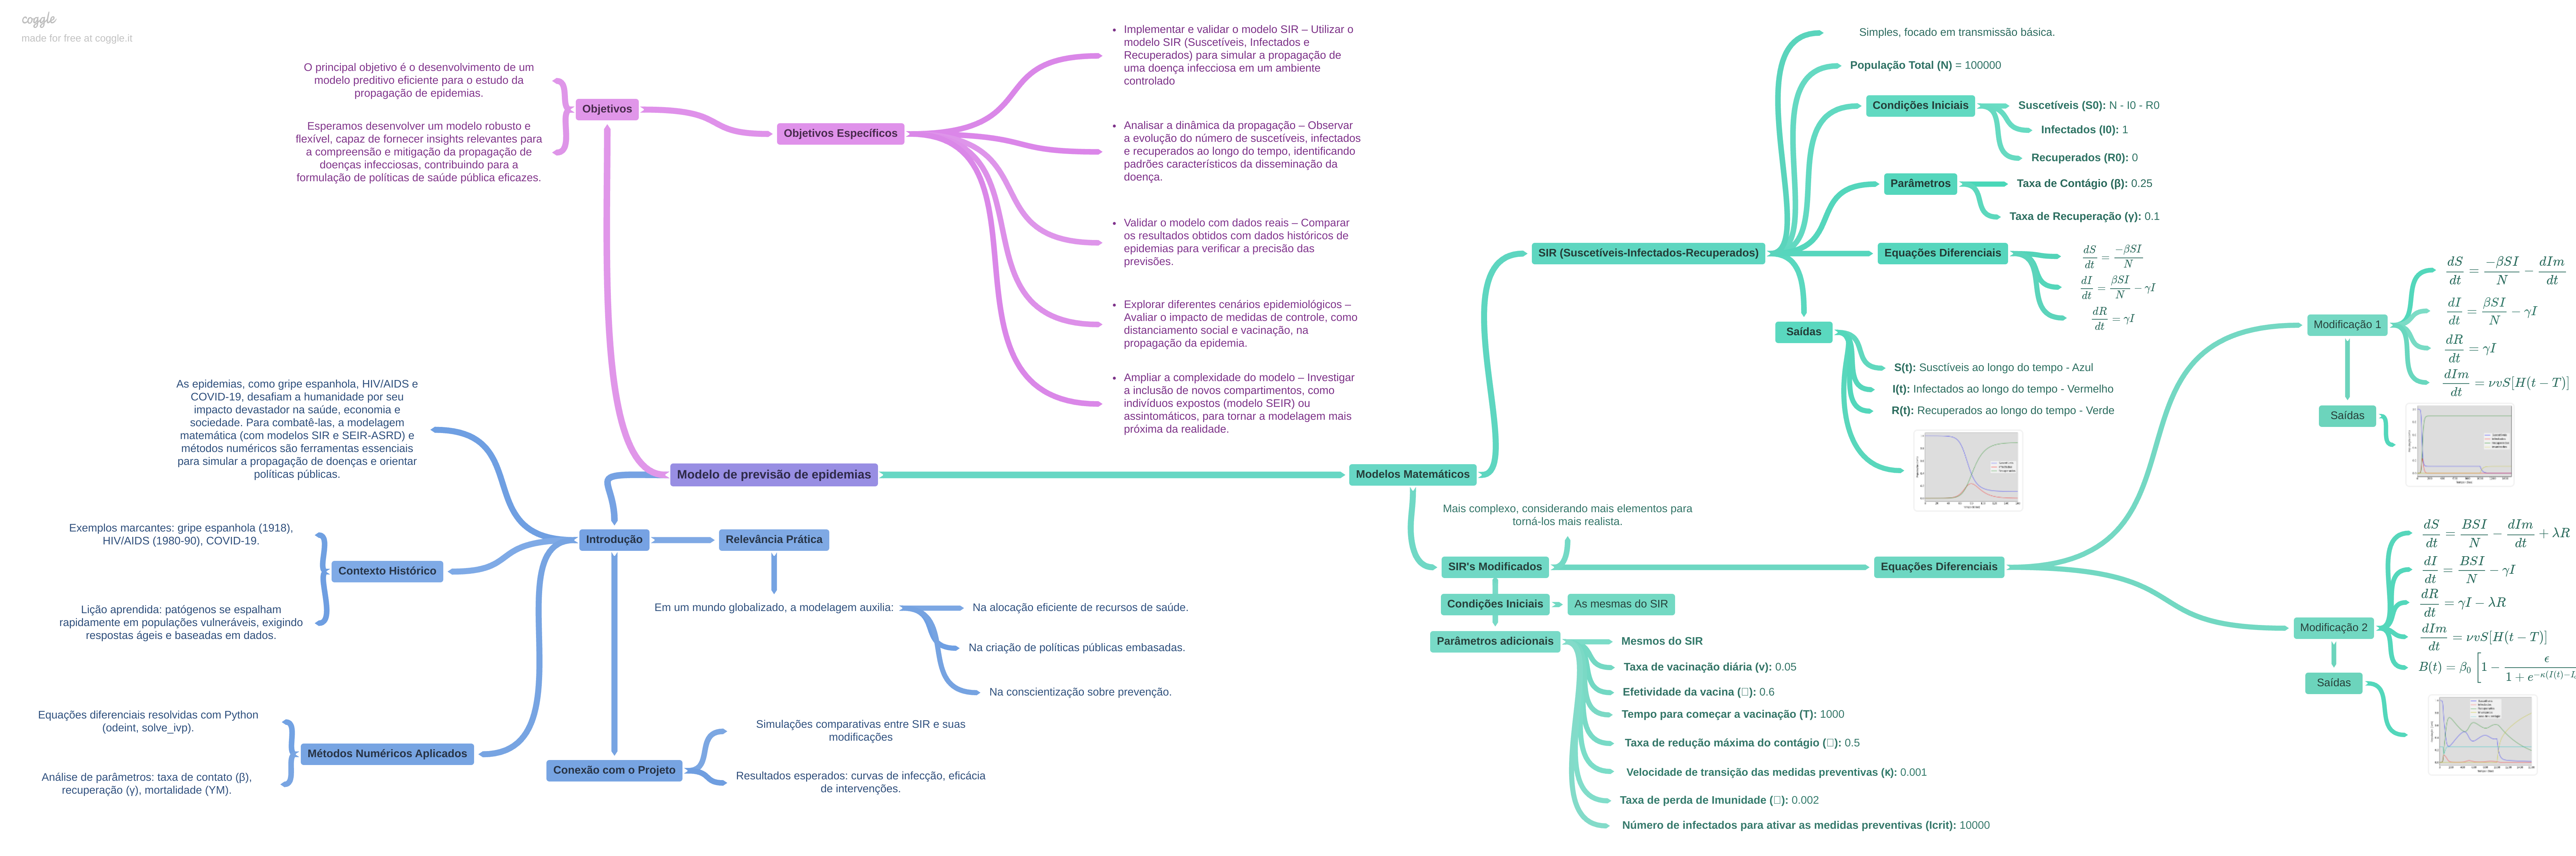

In [22]:
from IPython.display import display
from PIL import Image

img = Image.open("../resource/Mapa Mental.png")
display(img)

# Modelo SIR

O modelo SIR é um modelo epidemiológico simples que divide a população em três compartimentos:
- **S(t)**: número de indivíduos suscetíveis à doença.
- **I(t)**: número de indivíduos infectados.
- **R(t)**: número de indivíduos removidos (recuperados ou mortos).

A dinâmica do modelo baseia-se nas taxas de contato e recuperação.

O modelo SIR é regidos pelas seguintes equações diferenciadas:

$$
\frac{dS}{dt} = \frac{-\beta S I}{N}
$$

$$
\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I
$$

$$
\frac{dR}{dt} = \gamma I
$$

Com:
- (N): População total;
- ($\beta$): taxa de Contágio;
- ($\gamma$): taxa de Recuperação;

As equações visam simular a evolução temporal dos compartimentos, demonstrando as relações entre eles. Os parâmetros de taxa de contato e de recuperação refletem diferentes cenários epidemiológicos, como surtos mais ou menos agressivos.

In [23]:
# Bibliotecas
from math import sin
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Baixar o dataset
import requests
from io import BytesIO
import gzip

In [24]:
# Parâmetros de teste dos modelos:

# SIR
N = 100000  # População total
I0 = 1  # Número inicial de infectados e recuperados
R0 = 0  # Número inicial de recuperados
S0 = N - I0 - R0  # Número inicial de suscetíveis
Tx_cont = 0.25  # Taxa de contágio
Tx_rec = 0.1 # Taxa de recuperação
t0 = 0  # Tempo inicial
tf = 1600  # Tempo final

# SIR+
Im0 = 0 # Número inicial de imunizados
Tx_vac = 0.05 # Taxa de vacinação diária
vac_ef = 0.6 # Efetividade da vacina
t_vac = 1000 # Tempo para se aplicar a vacina

# SIR++
Tx_desR = 0.002 # Taxa da perda de imunidade dos recuperados
I_crit = 10000 # Número de infectados para ativar medidas preventivas;
Tx_redcont = 0.5 # Taxa de redução do contágio
vel_prev = 0.001 # Velocidade de implementação das medidas preventivas

In [25]:
# Modelo SIR

# Equações diferenciais do modelo SIR
def deriv(y, t, N, Tx_cont, Tx_rec):
    S, I, R = y
    dSdt = -Tx_cont * S * I / N
    dIdt = Tx_cont * S * I / N - Tx_rec * I
    dRdt = Tx_rec * I

    return dSdt, dIdt, dRdt

# Vetor de condições iniciais
y0 = S0, I0, R0

# Intervalo de tempo (em dias)
t = np.linspace(t0, tf, tf-t0)

# Resolvendo as equações diferenciais
ret = odeint(deriv, y0, t, args=(N, Tx_cont, Tx_rec))
S, I, R = ret.T

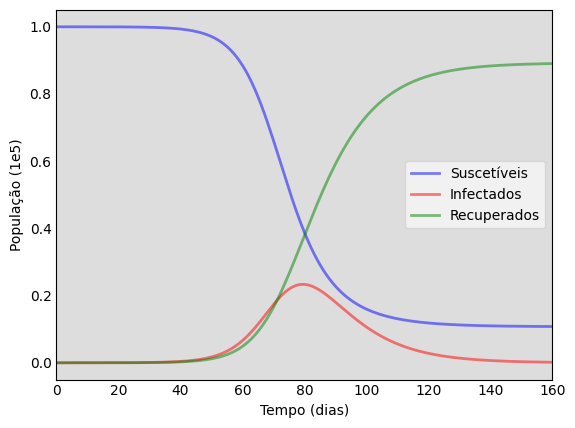

In [26]:
# Plotando os resultados do modelo SIR
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Suscetíveis')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População (1e5)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0, 160]) # Ajuste do eixo X
legend = ax.legend()
legend.get_frame().set_alpha(0.6)

plt.show()




### Modelo SIR+ (SIR modificado)

O modelo SIR+ é uma ampliação do modelo SIR, adicionando vacinação ou medicamento nas equações:
- **S(t)**: Suscetíveis;
- **I(t)**: Infectados;
- **R(t)**: Recuperados;
- **Im(t)**: Imunizados;

As equações que o regem passam a ser:

$$
\frac{dS}{dt} = \frac{-\beta S I}{N} - \frac{dIm}{dt}
$$

$$
\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I
$$

$$
\frac{dR}{dt} = \gamma I
$$

$$
\frac{dIm}{dt} = \nu vS [H(t-T)]
$$

Com:
- (N): População total;
- ($\beta$): Taxa de Contágio;
- ($\gamma$): Taxa de Recuperação;
- (v): Taxa de vacinação;
- ($\nu$): Efetividade da vacina;
- (H(x)): Função degrau;
- (T): Tempo para começar a vacinação;

Dessa maneira, a função degrau faz com que haja um intervalo para a aplicação das vacinas e as vacinas reduzem a quantidade de infectados.


In [27]:
# Modelo SIR+

# Equações diferenciais do modelo SIR+
def deriv(y, t, N, Tx_cont, Tx_rec, Tx_vac, vac_ef, t_vac):
    S, I, R, Im = y

    # Função degrau: 0 se t < t_vac, 1 se t >= t_vac
    vacina_ativa = 1 if t >= t_vac else 0

    dSdt = -Tx_cont * S * I / N - vac_ef * Tx_vac * S * vacina_ativa
    dIdt = Tx_cont * S * I / N - Tx_rec * I
    dRdt = Tx_rec * I
    dImdt = vac_ef * Tx_vac * S * vacina_ativa

    return dSdt, dIdt, dRdt, dImdt

# Vetor de condições iniciais
y0 = S0, I0, R0, Im0

# Intervalo de tempo (em dias)
t = np.linspace(t0, tf, tf-t0)

# Resolvendo as equações diferenciais
ret = odeint(deriv, y0, t, args=(N, Tx_cont, Tx_rec, Tx_vac, vac_ef, t_vac))
S, I, R, Im = ret.T

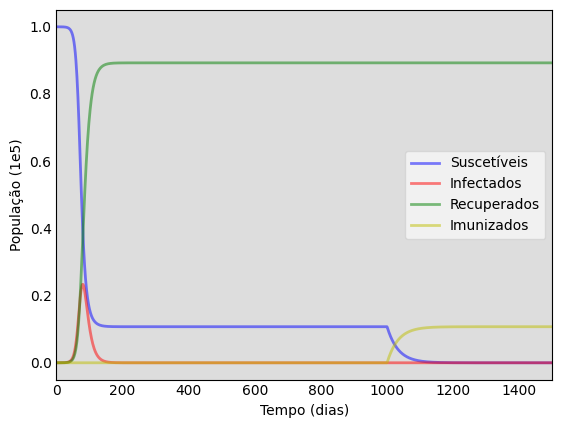

In [28]:
# Plotando os resultados do modelo SIR+
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Suscetíveis')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(t, Im/N, 'y', alpha=0.5, lw=2, label='Imunizados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População (1e5)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0, 1500]) # Ajusta do eixo X
legend = ax.legend()
legend.get_frame().set_alpha(0.6)

plt.show()


### Modelo SIR++ (SIR+ modificado)

O modelo SIR++ considera a reincidência e medidas de isolamento e medicamento:
- **S(t)**: Suscetíveis;
- **I(t)**: Infectados;
- **R(t)**: Recuperados;
- **Im(t)**: Imunizados;
- **B(t)**: Taxa de contágio;

A dinâmica do SIR se aplica nesse modelo, mas de forma mais sofisticada permitindo capturar estágios mais detalhados da progressão da doença.

As equações que o regem passam a ser:

$$
\frac{dS}{dt} = \frac{B S I}{N} - \frac{dIm}{dt} + \lambda R
$$

$$
\frac{dI}{dt} = \frac{B S I}{N} - \gamma I
$$

$$
\frac{dR}{dt} = \gamma I - \lambda R
$$

$$
\frac{dIm}{dt} = \nu vS [H(t-T)]
$$

$$
B(t) = \beta_0 \left[ 1 - \frac{\epsilon}{1 + e^{-\kappa (I(t) - I_{\text{crit}})}} \right]
$$

Com:
- (N): População total;
- ($\beta_0$): Taxa de Contágio Inicial;
- ($\gamma$): Taxa de Recuperação;
- (v): Taxa de vacinação;
- ($\nu$): Efetividade da vacina;
- (H(x)): Função degrau;
- (T): Tempo para começar a vacinação;
- ($\epsilon$): Taxa de redução máxima do contágio;
- ($\kappa$): Velocidade de transição das medidas preventivas;
- ($\lambda$): Taxa de perda de Imunidade;
- ($I_{\text{crit}}$): Número de infectados para ativar as medidas preventivas;


In [29]:
# Modelo SIR++

# Equações diferenciais do modelo SIR++
def deriv(y, t, N, Tx_cont, Tx_rec, Tx_vac, Tx_desR, vac_ef, t_vac, I_crit, Tx_redcont, vel_prev):
    S, I, R, Im = y

    # Função degrau: 0 se t < t_vac, 1 se t >= t_vac
    vacina_ativa = 1 if t >= t_vac else 0
    lockdown_factor = Tx_redcont / (1 + np.exp(-vel_prev * (I - I_crit)))

    B = Tx_cont * (1-lockdown_factor)
    dSdt = -B * S * I / N - vac_ef * Tx_vac * S * vacina_ativa + Tx_desR * R
    dIdt = B * S * I / N - Tx_rec * I
    dRdt = Tx_rec * I - Tx_desR * R
    dImdt = vac_ef * Tx_vac * S * vacina_ativa

    return dSdt, dIdt, dRdt, dImdt

# Vetor de condições iniciais
y0 = S0, I0, R0, Im0

# Intervalo de tempo (em dias)
t = np.linspace(t0, tf, tf-t0)

# Resolvendo as equações diferenciais
ret = odeint(deriv, y0, t, args=(N, Tx_cont, Tx_rec, Tx_vac, Tx_desR, vac_ef, t_vac, I_crit, Tx_redcont, vel_prev))
S, I, R, Im = ret.T

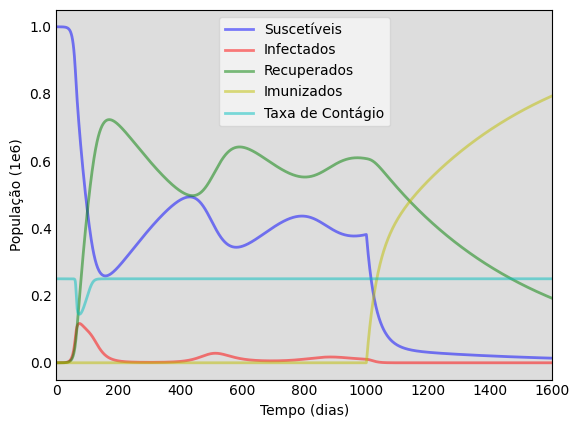

In [30]:
# Plotando os resultados do modelo SIR++
fig = plt.figure(facecolor='w')

active = False
activation_time = -np.inf  # tempo em que ativou
B = []
for i in I:
    epsilon = 0.5
    kappa = 0.001
    lockdown_factor = epsilon / (1 + np.exp(-kappa * (i - I_crit)))
    B.append(Tx_cont * (1 - lockdown_factor))

ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Suscetíveis')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(t, Im/N, 'y', alpha=0.5, lw=2, label='Imunizados')
ax.plot(t, B, 'c', alpha=0.5, lw=2, label='Taxa de Contágio')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População (1e6)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0, 1600]) # Ajusta do eixo X
legend = ax.legend()
legend.get_frame().set_alpha(0.6)

plt.show()

# Resultados Reais

Apresentação de dados reais adiquiridos no site [Brasil.io](https://brasil.io/covid19/). Nesses dados podemos observar uma pequena similaridade com a simulação feita no modelo SIR padrão.

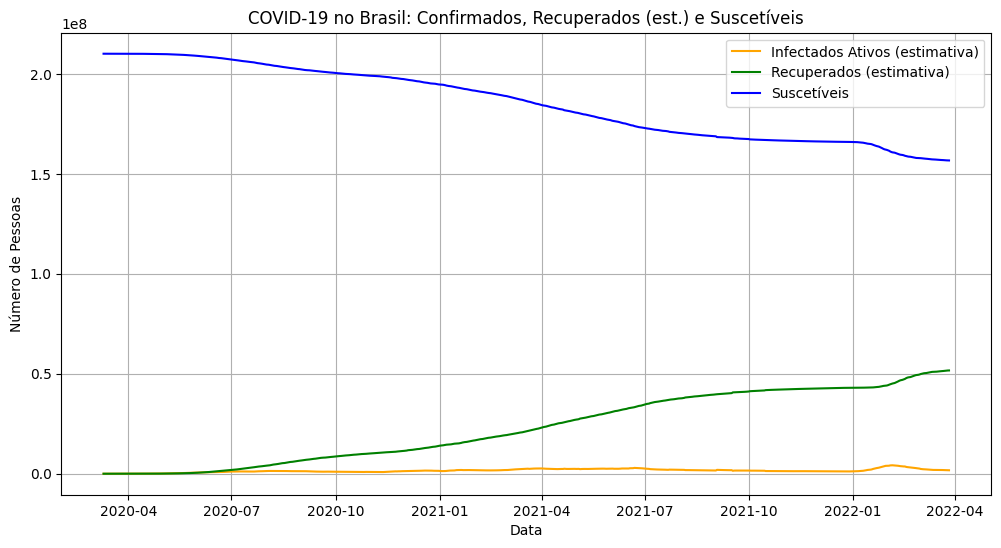

In [31]:
# Link direto para o arquivo .csv.gz
url = 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'

headers = {
    'User-Agent': 'Mozilla/5.0'
}

response = requests.get(url, headers=headers)
response.raise_for_status()  # dispara erro se a resposta for 403, 404 etc

# Descompactar e ler direto com pandas
with gzip.open(BytesIO(response.content), 'rt') as f:
    df = pd.read_csv(f)
    
# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

df_validas = df[(df['is_last'] == True) & (df['is_repeated'] == False) & (df['place_type'] == 'city')]
populacao_brasil = df_validas.groupby('city_ibge_code')['estimated_population_2019'].first().sum()

# Agrupar por data (total Brasil)
diario = df.groupby('date').agg({
    'last_available_confirmed': 'sum',
    'last_available_death_rate': 'mean',  # média da taxa de mortalidade no país
}).reset_index()

diario['estimated_population_2019'] = populacao_brasil
# Calcular recuperados com base na taxa de mortalidade
diario['confirmados_Dmenos14'] = diario['last_available_confirmed'].shift(14)
diario['recuperados'] = diario['confirmados_Dmenos14'] * (1 - diario['last_available_death_rate'])
diario['recuperados'] = diario['recuperados'].clip(lower=0)

# Infectados ativos = confirmados - recuperados - óbitos
diario['infectados_ativos'] = (
    diario['last_available_confirmed']
    - diario['recuperados']
).clip(lower=0)

# Suscetíveis = população - confirmados
diario['suscetiveis'] = diario['estimated_population_2019'] - diario['infectados_ativos'] - diario['recuperados']

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(diario['date'], diario['infectados_ativos'], label='Infectados Ativos (estimativa)', color='orange')
plt.plot(diario['date'], diario['recuperados'], label='Recuperados (estimativa)', color='green')
plt.plot(diario['date'], diario['suscetiveis'], label='Suscetíveis', color='blue')
plt.xlabel('Data')
plt.ylabel('Número de Pessoas')
plt.title('COVID-19 no Brasil: Confirmados, Recuperados (est.) e Suscetíveis')
plt.legend()
plt.grid(True)

plt.show()

# Discussão dos Resultados

A partir da implementação progressiva das modificações no modelo SIR clássico, foi possível observar como fatores externos e políticas de saúde pública influenciam significativamente o curso de uma epidemia. O modelo SIR tradicional, regido pelas equações diferenciais básicas, fornece uma visão simplificada da propagação de doenças, assumindo uma taxa de contágio constante e ausência de intervenções. Embora útil para análises iniciais, esse modelo não contempla aspectos dinâmicos e reais de uma epidemia, como vacinação, perda de imunidade ou mudanças comportamentais da população.

Para tornar o modelo mais realista, foram feitas alterações importantes, descritas a seguir:

### 1. Vacinação

A vacinação foi incorporada ao modelo por meio do termo:

$$
\frac{dIm}{dt} = \nu vS \cdot H(t – T)
$$

Esse termo representa a transição de indivíduos suscetíveis $(S)$ para o grupo de imunizados $(Im)$, a partir de um tempo $(T)$, com taxa de vacinação $(v)$ e efetividade da vacina $(\nu)$. A função degrau de Heaviside, $(H(t – T))$, garante que a vacinação só tem início após o tempo estabelecido $(T)$.

**Impactos observados:**
- Houve uma redução direta da população suscetível após o tempo $(T)$, resultando em menor taxa de novos infectados.
- Quanto maior a efetividade da vacina $(\nu)$ e a taxa de vacinação $(v)$, mais rápida e eficiente é a contenção da epidemia.
- O modelo permite simular de forma realista o impacto de campanhas de vacinação iniciadas em momentos estratégicos.


### 2. Taxa de Contágio Adaptativa

A taxa de contágio, antes constante, passou a depender do número de infectados no tempo, segundo a função:

$$
B(t) = \beta_0 \left[ 1 - \frac{\epsilon}{1 + e^{-\kappa (I(t) – I_{\text{crit}})}} \right]
$$

Essa função logística simula a introdução de medidas preventivas (como distanciamento social ou uso de máscaras), que se tornam mais efetivas conforme o número de infectados ultrapassa um limiar crítico $(I_{\text{crit}})$.

**Impactos observados:**
- O modelo passou a responder dinamicamente ao avanço da epidemia: quanto maior o número de infectados, maior a atuação das medidas de contenção (redução de $( B(t))$).
- A taxa de redução máxima do contágio $(\epsilon)$ define o quão eficazes essas medidas podem ser.
- A constante $(\kappa)$ regula a rapidez da resposta: valores maiores resultam em uma transição mais brusca, enquanto valores menores tornam a resposta mais gradual.


### 3. Perda de Imunidade

Para representar doenças em que a imunidade é temporária, foi adicionado o termo de perda de imunidade nas equações dos recuperados e suscetíveis:

$$
\frac{dR}{dt} = \gamma I - \lambda R; \quad \frac{dS}{dt} = \dots + \lambda R
$$

Esse ajuste permite que indivíduos anteriormente curados retornem à classe de suscetíveis após um tempo.

**Impactos observados:**
- Possibilidade de reinfecção: indivíduos que perdem a imunidade voltam a contribuir para a propagação da doença.
- Geração de múltiplas ondas epidêmicas, especialmente em cenários com baixa efetividade vacinal ou ausência de reforços.
- Reforça a importância de campanhas de revacinação ou medidas contínuas de monitoramento e prevenção.


## Interpretação dos Modelos Criados

A análise dos resultados numéricos e gráficos obtidos com o modelo modificado mostra que:

- A **vacinação eficiente e antecipada** reduz significativamente a propagação da doença.
- A **taxa de contágio adaptativa** imita medidas preventivas reais, controlando surtos conforme o número de infectados aumenta.
- A **perda de imunidade** exige atenção contínua das autoridades de saúde, pois mantém o risco de novas ondas epidêmicas.

O modelo passa a representar melhor a complexidade dos surtos epidêmicos, permitindo que se simulem respostas a diferentes estratégias de intervenção em tempo real. Isso oferece uma ferramenta poderosa para prever a eficácia de medidas como campanhas de vacinação, reforço de imunizações e políticas de distanciamento.


## Limitações do Modelo Proposto

Apesar de representar avanços significativos em relação ao modelo SIR clássico, o modelo ainda apresenta algumas limitações importantes:

1.	**Homogeneidade da População:**  
   O modelo assume que todos os indivíduos possuem as mesmas chances de contágio, ignorando fatores como idade, comorbidades, localização geográfica ou redes sociais de contato.

2.	**Vacinação Idealizada:**  
   Considera-se que todos os indivíduos suscetíveis possam ser vacinados de forma homogênea e que a aplicação ocorre de maneira eficiente, o que não corresponde à realidade de muitas regiões.

3.	**Resposta Social Simplificada:**  
   A função logística usada para representar medidas de contenção é uma aproximação simplificada do comportamento social, que pode variar com fatores culturais, políticos ou econômicos.

4.	**Ausência de Incubação:**  
   O modelo não inclui uma fase de exposição (como no modelo SEIR), o que pode afetar a precisão da modelagem em doenças com período de incubação significativo.

5.	**Determinismo:**  
   O modelo é determinístico, não incorporando incertezas e variações estocásticas naturais de um surto (ex: superdisseminadores, mutações, sazonalidade, entre outros).


# Conclusão

As modificações propostas ao modelo SIR evidenciam a importância de incorporar variáveis e políticas públicas realistas na modelagem de epidemias. A introdução da vacinação, da perda de imunidade e da taxa de contágio adaptativa permitiu um retrato mais fiel da dinâmica de uma doença infecciosa em uma população.

Os resultados demonstram que o controle eficaz de uma epidemia depende não apenas de fatores biológicos, como a taxa de recuperação ou a efetividade da vacina, mas também de estratégias de intervenção rápidas, coordenadas e adaptativas.

Portanto, o modelo estendido apresentado não apenas melhora a capacidade preditiva, mas também pode servir como ferramenta de apoio à tomada de decisões em saúde pública. Ele permite avaliar cenários diversos, antecipar comportamentos da epidemia e contribuir para estratégias mais eficientes e conscientes de controle epidemiológico.